In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version= 1, as_frame= False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X,y =mnist['data'], mnist['target']
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

In [4]:
y[0]

'5'

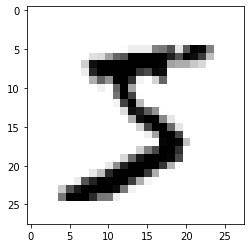

In [91]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(
   some_digit_image, 
   cmap = matplotlib.cm.binary,
   interpolation="nearest")
   #plt.axis("off")
   #plt.show()

In [6]:
y[0]

'5'

In [7]:
import numpy as np
y=y.astype(np.uint8)

In [8]:
y[0]

5

In [9]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
type(X_train)

numpy.ndarray

In [13]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [15]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state= 42)
sgd_clf.fit(X_train,y_train_5)


SGDClassifier(random_state=42)

In [16]:
sgd_clf.predict([some_digit])

array([ True])

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=10,shuffle=True, random_state= 42)
for train_index, test_index in skfolds.split (X_train,y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred= clone_clf.predict(X_test_fold)
    n_correct= sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))


0.9646666666666667
0.9633333333333334
0.9703333333333334
0.9521666666666667
0.9518333333333333
0.9601666666666666
0.9728333333333333
0.9676666666666667
0.9661666666666666
0.9665


In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv= 10, scoring="accuracy")

array([0.96416667, 0.95866667, 0.96416667, 0.95833333, 0.96733333,
       0.96933333, 0.96433333, 0.96583333, 0.9575    , 0.96566667])

In [19]:
from sklearn.base import BaseEstimator
class Never5Classifier (BaseEstimator):
    def fit (self,X,y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1),dtype=bool)

In [20]:
never_5_clf= Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [21]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [22]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [23]:
y_train_perfect_prediction = y_train_5
confusion_matrix(y_train_5,y_train_perfect_prediction)

array([[54579,     0],
       [    0,  5421]])

In [24]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [25]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [26]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [27]:
y_scores= sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [28]:
threshold = 0 
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [29]:
threshold = 8000 
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [30]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method= "decision_function")

In [31]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [32]:
from sklearn.metrics import precision_recall_curve
precissions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

In [33]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)
def plot_precision_recall_vs_threshold (precisions,recalls, thresholds):
    plt.plot (thresholds,precisions[:-1],"b--", label = "Precision")
    plt.plot (thresholds,recalls[:-1],"r-", label = "recalls")
    plt.xlabel("Threshold")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.1)
    plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)
   

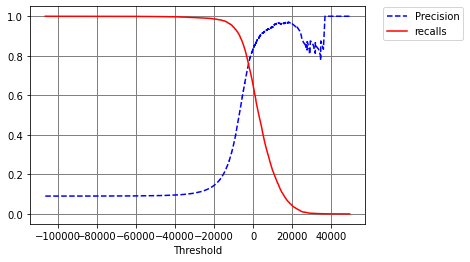

In [34]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
   

Text(0.5, 1.0, 'Precision versus recall')

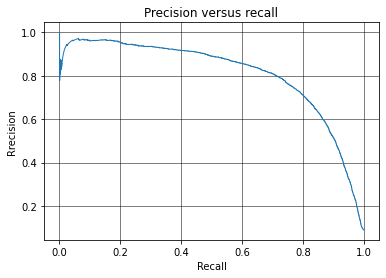

In [35]:
%matplotlib inline
plt.plot(recalls,precisions,linewidth= 1)
plt.grid(b=True, which="both", axis="both", color='black', linestyle='-', linewidth=0.5)
plt.xlabel('Recall')
plt.ylabel("Rrecision")
plt.title("Precision versus recall")

In [36]:
threshold_90_precision = thresholds[np.argmax(precisions>=.90)]

In [37]:
y_train_pred_90= (y_scores >= threshold_90_precision)

In [38]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [39]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

In [40]:
from sklearn.metrics import roc_curve
fpr,tpr, thresholds= roc_curve(y_train_5, y_scores)


In [41]:
def plot_roc_curve (fpr,tpr, label= None):
    plt.plot(fpr,tpr, linewidth=2, label= label)
    plt.plot([0,1], [0,1], 'k--')
    plt.grid(b=True, which="both", axis="both", color='black', linestyle='-', linewidth=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title ("ROC Curve")

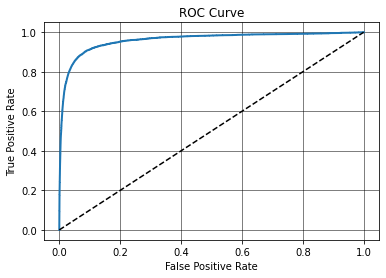

In [42]:
plot_roc_curve(fpr,tpr)

In [43]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [44]:
from sklearn.ensemble import RandomForestClassifier
forest_clf= RandomForestClassifier(random_state=42)
y_probas_forest=  cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
 

In [45]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [46]:
y_probas_forest[:,0]

array([0.11, 0.99, 0.96, ..., 0.02, 0.92, 0.94])

In [47]:
y_scores_forest=y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5,y_scores_forest)

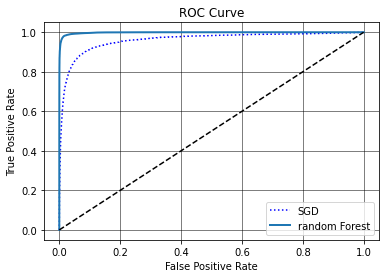

In [48]:
plt.plot(fpr,tpr,"b:", label = "SGD")
plot_roc_curve(fpr_forest,tpr_forest, "random Forest")
plt.legend(loc= "lower right")
plt.show()

In [49]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

In [50]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [51]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [52]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [53]:
np.argmax(some_digit_scores)

3

In [54]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [55]:
sgd_clf.classes_[3]

3

In [56]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf= OneVsOneClassifier(SGDClassifier(random_state= 42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

array([5], dtype=uint8)

In [57]:
len(ovo_clf.estimators_)

45

In [58]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array([5], dtype=uint8)

In [59]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [60]:
cross_val_score(sgd_clf,X_train,y_train, cv=3 , scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train,y_train,cv = 3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [62]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train,cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

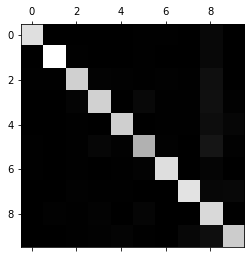

In [71]:
plt.matshow(conf_mx,cmap =plt.cm.gray)
plt.show()

In [68]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums

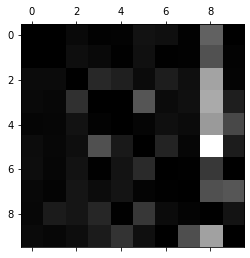

In [70]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)

In [75]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [76]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]


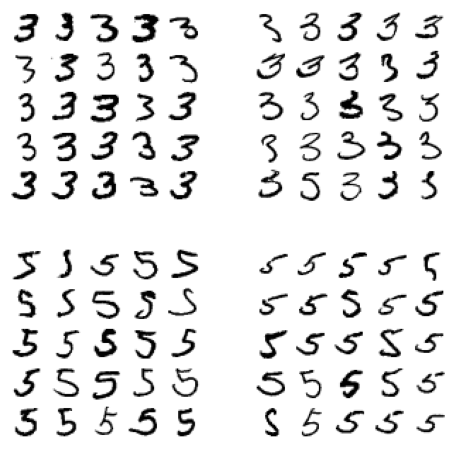

In [77]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [80]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large,y_train_odd]
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [81]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [83]:
y_train_knn_pred =  cross_val_predict(knn_clf,X_train, y_multilabel, cv=3)
f1_score(y_multilabel,y_train_knn_pred, average = "macro")

0.976410265560605

In [84]:
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod= X_train + noise 
noise =  np.random.randint (0,100,(len(X_test),784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

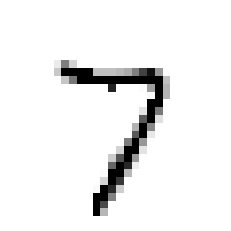

In [97]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digits(clean_digit)

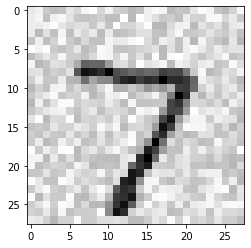

In [95]:
some_index= X_test_mod[0]
some_index_image = some_index.reshape(28, 28)
plt.imshow(
   some_index_image, 
   cmap = matplotlib.cm.binary,
   interpolation="nearest")